In [1]:
import numpy as np
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import scipy.io
from scipy import interpolate

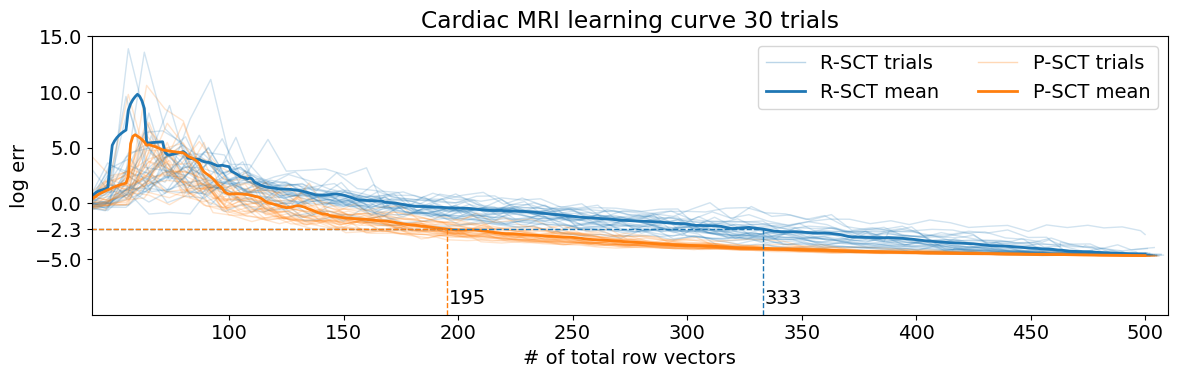

In [3]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[12,4])

err_logRS_interp = np.zeros((30,500-30+1))
err_logPS_interp = np.zeros((30,500-30+1))

for i in range(30):
    err_logPS = np.load(f'outputs/Cardiac_err_log_PSCT_{i}.npy',allow_pickle=True)
    err_logRS = np.load(f'outputs/Cardiac_err_log_RSCT_{i}.npy',allow_pickle=True)
    nf_PS = np.load(f'outputs/Cardiac_nf_PSCT_{i}.npy',allow_pickle=True)
    nf_RS = np.load(f'outputs/Cardiac_nf_RSCT_{i}.npy',allow_pickle=True)
    
    f_PS = interpolate.interp1d(nf_PS, err_logPS)
    err_logPS_interp[i] = f_PS(np.linspace(30,500,500-30+1))
    f_RS = interpolate.interp1d(nf_RS, err_logRS)
    err_logRS_interp[i] = f_RS(np.linspace(30,500,500-30+1))
    
    plt.plot(nf_RS[1:], np.log(err_logRS)[1:],color='C0',alpha=0.2,lw=1)
    plt.plot(nf_PS[1:], np.log(err_logPS)[1:],color='C1',alpha=0.2,lw=1)
    
err_logPS_interp = np.sort(err_logPS_interp,axis=0)
err_logRS_interp = np.sort(err_logRS_interp,axis=0)

plt.plot(np.linspace(30,500,500-30+1)[:], np.log(np.mean(err_logRS_interp[1:-1,:],axis=0)),color='C0',lw=2)
plt.plot(np.linspace(30,500,500-30+1)[:], np.log(np.mean(err_logPS_interp[1:-1,:],axis=0)),color='C1',lw=2)

RS_numsample_target = np.linspace(30,500,500-30+1)[np.where(np.mean(err_logRS_interp[1:-1,:],axis=0)<0.1)[0][0]]
PS_numsample_target = np.linspace(30,500,500-30+1)[np.where(np.mean(err_logPS_interp[1:-1,:],axis=0)<0.1)[0][0]]

plt.hlines(np.log(0.1),30,RS_numsample_target,color='C0',linestyle='--',lw=1)
plt.vlines(RS_numsample_target,-10,np.log(0.1),color='C0',linestyle='--',lw=1)

plt.hlines(np.log(0.1),30,PS_numsample_target,color='C1',linestyle='--',lw=1)
plt.vlines(PS_numsample_target,-10,np.log(0.1),color='C1',linestyle='--',lw=1)

RS_lines = mlines.Line2D([], [], color='C0',alpha=0.3,lw=1,label='R-SCT trials')
PS_lines = mlines.Line2D([], [], color='C1',alpha=0.3,lw=1,label='P-SCT trials')
RS_mean = mlines.Line2D([], [], color='C0', lw=2, label='R-SCT mean')
PS_mean = mlines.Line2D([], [], color='C1', lw=2, label='P-SCT mean')

plt.legend(handles=[RS_lines,RS_mean,PS_lines,PS_mean],ncol=2)

plt.ylabel('log err')
plt.xlabel('# of total row vectors')
plt.title('Cardiac MRI learning curve 30 trials')
plt.xticks([30,100,150,200,250,300,350,400,450,500])
plt.yticks([-5,np.log(0.1),0,5,10,15])
plt.xlim([40,510])
plt.ylim([-10,15])

plt.annotate(f'{int(RS_numsample_target)}', (RS_numsample_target+1,-9))
plt.annotate(f'{int(PS_numsample_target)}', (PS_numsample_target+1,-9))

plt.tight_layout()
plt.savefig('../plots/supp_cardiac_lc1_ACML.png',dpi=600)
plt.show()

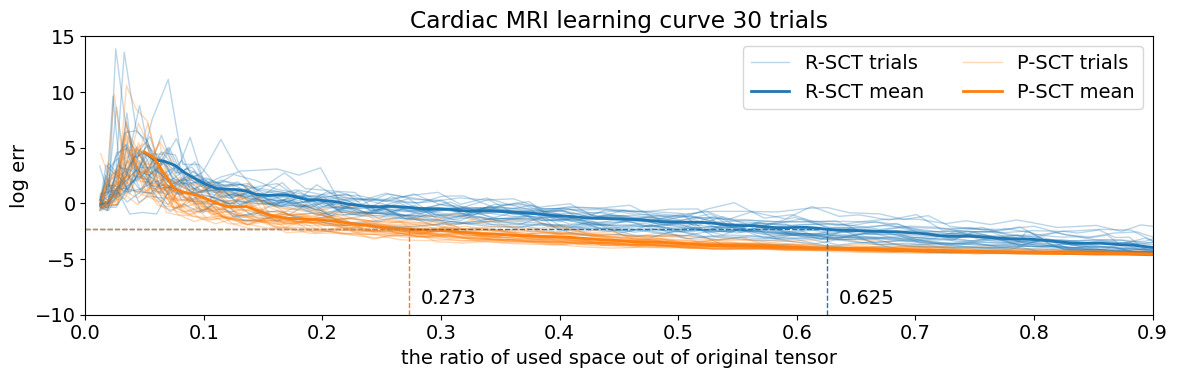

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[12,4])

err_logPS_interp = np.zeros((30,100))
err_logRS_interp = np.zeros((30,100))

for i in range(30):
    err_logPS = np.load(f'outputs/Cardiac_err_log_PSCT_{i}.npy',allow_pickle=True)
    err_logRS = np.load(f'outputs/Cardiac_err_log_RSCT_{i}.npy',allow_pickle=True)
    nf_PS = np.load(f'outputs/Cardiac_memory_log_PSCT_{i}.npy',allow_pickle=True)/256/176/160
    nf_RS = np.load(f'outputs/Cardiac_memory_log_RSCT_{i}.npy',allow_pickle=True)/256/176/160
    
    f_PS = interpolate.interp1d(nf_PS, err_logPS)
    err_logPS_interp[i] = f_PS(np.linspace(0.05,0.9,100))
    f_RS = interpolate.interp1d(nf_RS, err_logRS)
    err_logRS_interp[i] = f_RS(np.linspace(0.05,0.9,100))
    
    plt.plot(nf_RS[1:], np.log(err_logRS)[1:],color='C0',alpha=0.3,lw=1)
    plt.plot(nf_PS[1:], np.log(err_logPS)[1:],color='C1',alpha=0.3,lw=1)

err_logPS_interp = np.sort(err_logPS_interp,axis=0)
err_logRS_interp = np.sort(err_logRS_interp,axis=0)

plt.plot(np.linspace(0.05,0.9,100)[:], np.log(np.mean(err_logRS_interp[1:-1,:],axis=0)),color='C0',lw=2)
plt.plot(np.linspace(0.05,0.9,100)[:], np.log(np.mean(err_logPS_interp[1:-1,:],axis=0)),color='C1',lw=2)

PS_numsample_target = np.linspace(0.05,0.9,100)[np.where(np.mean(err_logPS_interp[1:-1,:],axis=0)<0.1)[0][0]]
RS_numsample_target = np.linspace(0.05,0.9,100)[np.where(np.mean(err_logRS_interp[1:-1,:],axis=0)<0.1)[0][0]]

plt.hlines(np.log(0.1),0,RS_numsample_target,color='C0',linestyle='--',lw=1)
plt.vlines(RS_numsample_target,-10,np.log(0.1),color='C0',linestyle='--',lw=1)

plt.hlines(np.log(0.1),0,PS_numsample_target,color='C1',linestyle='--',lw=1)
plt.vlines(PS_numsample_target,-10,np.log(0.1),color='C1',linestyle='--',lw=1)

RS_lines = mlines.Line2D([], [], color='C0',alpha=0.3,lw=1,label='R-SCT trials')
PS_lines = mlines.Line2D([], [], color='C1',alpha=0.3,lw=1,label='P-SCT trials')

RS_mean = mlines.Line2D([], [], color='C0', lw=2, label='R-SCT mean')
PS_mean = mlines.Line2D([], [], color='C1', lw=2, label='P-SCT mean')

plt.legend(handles=[RS_lines,RS_mean,PS_lines,PS_mean],ncol=2)

plt.ylabel('log err')
plt.xlabel('the ratio of used space out of original tensor')
plt.title('Cardiac MRI learning curve 30 trials')
plt.xlim([0,0.9])
plt.ylim([-10,15])

plt.annotate(f'{np.round(PS_numsample_target,3)}', (PS_numsample_target+0.01,-9))
plt.annotate(f'{np.round(RS_numsample_target,3)}', (RS_numsample_target+0.01,-9))

plt.tight_layout()
plt.savefig('../plots/supp_cardiac_lc2_ACML.png',dpi=600)
plt.show()

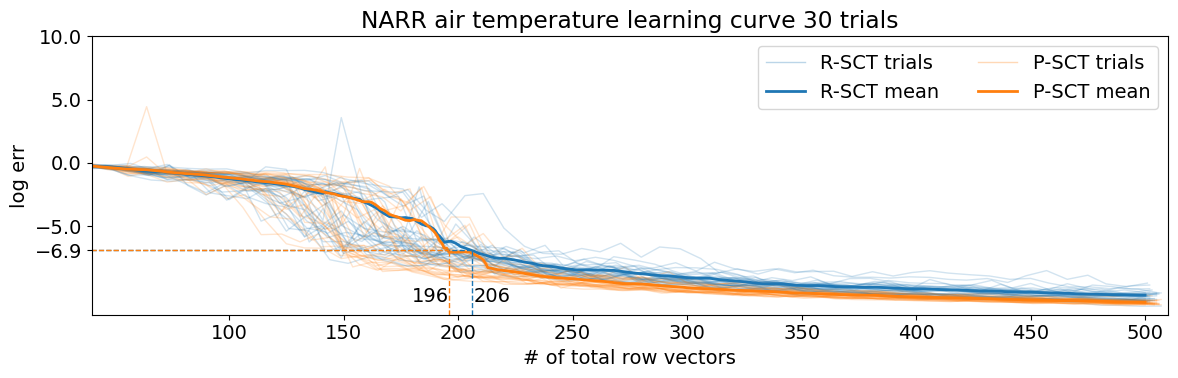

In [12]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[12,4])

err_logRS_interp = np.zeros((30,500-30+1))
err_logPS_interp = np.zeros((30,500-30+1))

for i in range(30):
    err_logPS = np.load(f'outputs/AirTemp_err_log_PSCT_{i}.npy',allow_pickle=True)
    err_logRS = np.load(f'outputs/AirTemp_err_log_RSCT_{i}.npy',allow_pickle=True)
    nf_PS = np.load(f'outputs/AirTemp_nf_PSCT_{i}.npy',allow_pickle=True)
    nf_RS = np.load(f'outputs/AirTemp_nf_RSCT_{i}.npy',allow_pickle=True)
    
    f_PS = interpolate.interp1d(nf_PS, err_logPS)
    err_logPS_interp[i] = f_PS(np.linspace(30,500,500-30+1))
    f_RS = interpolate.interp1d(nf_RS, err_logRS)
    err_logRS_interp[i] = f_RS(np.linspace(30,500,500-30+1))
    
    plt.plot(nf_RS[1:], np.log(err_logRS)[1:],color='C0',alpha=0.2,lw=1)
    plt.plot(nf_PS[1:], np.log(err_logPS)[1:],color='C1',alpha=0.2,lw=1)
    
err_logPS_interp = np.sort(err_logPS_interp,axis=0)
err_logRS_interp = np.sort(err_logRS_interp,axis=0)

plt.plot(np.linspace(30,500,500-30+1)[:], np.log(np.mean(err_logRS_interp[1:-1,:],axis=0)),color='C0',lw=2)
plt.plot(np.linspace(30,500,500-30+1)[:], np.log(np.mean(err_logPS_interp[1:-1,:],axis=0)),color='C1',lw=2)

RS_numsample_target = np.linspace(30,500,500-30+1)[np.where(np.mean(err_logRS_interp[1:-1,:],axis=0)<0.001)[0][0]]
PS_numsample_target = np.linspace(30,500,500-30+1)[np.where(np.mean(err_logPS_interp[1:-1,:],axis=0)<0.001)[0][0]]

plt.hlines(np.log(0.001),30,RS_numsample_target,color='C0',linestyle='--',lw=1)
plt.vlines(RS_numsample_target,-12,np.log(0.001),color='C0',linestyle='--',lw=1)

plt.hlines(np.log(0.001),30,PS_numsample_target,color='C1',linestyle='--',lw=1)
plt.vlines(PS_numsample_target,-12,np.log(0.001),color='C1',linestyle='--',lw=1)

RS_lines = mlines.Line2D([], [], color='C0',alpha=0.3,lw=1,label='R-SCT trials')
PS_lines = mlines.Line2D([], [], color='C1',alpha=0.3,lw=1,label='P-SCT trials')
RS_mean = mlines.Line2D([], [], color='C0', lw=2, label='R-SCT mean')
PS_mean = mlines.Line2D([], [], color='C1', lw=2, label='P-SCT mean')

plt.legend(handles=[RS_lines,RS_mean,PS_lines,PS_mean],ncol=2)

plt.ylabel('log err')
plt.xlabel('# of total row vectors')
plt.title('NARR air temperature learning curve 30 trials')
plt.xticks([30,100,150,200,250,300,350,400,450,500])
plt.yticks([np.log(0.001),-5,0,5,10,15])
plt.xlim([40,510])
plt.ylim([-12,10])

plt.annotate(f'{int(RS_numsample_target)}', (RS_numsample_target+1,-11))
plt.annotate(f'{int(PS_numsample_target)}', (PS_numsample_target-16,-11))

plt.tight_layout()
plt.savefig('../plots/supp_AirTemp_lc1_ACML.png',dpi=600)
plt.show()

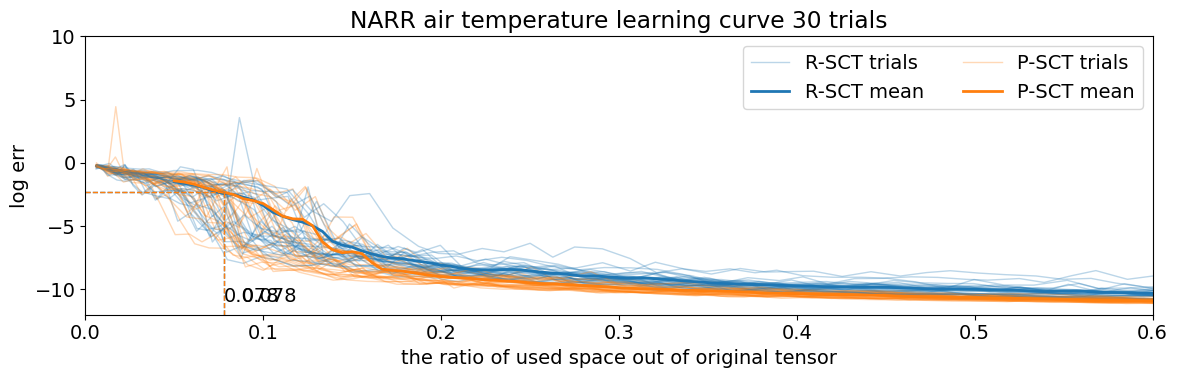

In [6]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[12,4])

err_logPS_interp = np.zeros((30,100))
err_logRS_interp = np.zeros((30,100))

for i in range(30):
    err_logPS = np.load(f'outputs/AirTemp_err_log_PSCT_{i}.npy',allow_pickle=True)
    err_logRS = np.load(f'outputs/AirTemp_err_log_RSCT_{i}.npy',allow_pickle=True)
    nf_PS = np.load(f'outputs/AirTemp_memory_log_PSCT_{i}.npy',allow_pickle=True)/248/252/336
    nf_RS = np.load(f'outputs/AirTemp_memory_log_RSCT_{i}.npy',allow_pickle=True)/248/252/336
    
    f_PS = interpolate.interp1d(nf_PS, err_logPS)
    err_logPS_interp[i] = f_PS(np.linspace(0.05,0.6,100))
    f_RS = interpolate.interp1d(nf_RS, err_logRS)
    err_logRS_interp[i] = f_RS(np.linspace(0.05,0.6,100))
    
    plt.plot(nf_RS[1:], np.log(err_logRS)[1:],color='C0',alpha=0.3,lw=1)
    plt.plot(nf_PS[1:], np.log(err_logPS)[1:],color='C1',alpha=0.3,lw=1)

err_logPS_interp = np.sort(err_logPS_interp,axis=0)
err_logRS_interp = np.sort(err_logRS_interp,axis=0)

plt.plot(np.linspace(0.05,0.6,100)[:], np.log(np.mean(err_logRS_interp[1:-1,:],axis=0)),color='C0',lw=2)
plt.plot(np.linspace(0.05,0.6,100)[:], np.log(np.mean(err_logPS_interp[1:-1,:],axis=0)),color='C1',lw=2)

PS_numsample_target = np.linspace(0.05,0.6,100)[np.where(np.mean(err_logPS_interp[1:-1,:],axis=0)<0.1)[0][0]]
RS_numsample_target = np.linspace(0.05,0.6,100)[np.where(np.mean(err_logRS_interp[1:-1,:],axis=0)<0.1)[0][0]]

plt.hlines(np.log(0.1),0,RS_numsample_target,color='C0',linestyle='--',lw=1)
plt.vlines(RS_numsample_target,-12,np.log(0.1),color='C0',linestyle='--',lw=1)

plt.hlines(np.log(0.1),0,PS_numsample_target,color='C1',linestyle='--',lw=1)
plt.vlines(PS_numsample_target,-12,np.log(0.1),color='C1',linestyle='--',lw=1)

RS_lines = mlines.Line2D([], [], color='C0',alpha=0.3,lw=1,label='R-SCT trials')
PS_lines = mlines.Line2D([], [], color='C1',alpha=0.3,lw=1,label='P-SCT trials')

RS_mean = mlines.Line2D([], [], color='C0', lw=2, label='R-SCT mean')
PS_mean = mlines.Line2D([], [], color='C1', lw=2, label='P-SCT mean')

plt.legend(handles=[RS_lines,RS_mean,PS_lines,PS_mean],ncol=2)

plt.ylabel('log err')
plt.xlabel('the ratio of used space out of original tensor')
plt.title('NARR air temperature learning curve 30 trials')
plt.xlim([0,0.6])
plt.ylim([-12,10])

plt.annotate(f'{np.round(PS_numsample_target,3)}', (PS_numsample_target,-11))
plt.annotate(f'{np.round(RS_numsample_target,3)}', (RS_numsample_target+0.01,-11))

plt.tight_layout()
plt.savefig('../plots/supp_AirTemp_lc2_ACML.png',dpi=600)
plt.show()

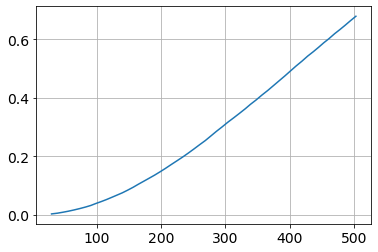

In [32]:
nf_PS2 = np.load(f'outputs/AirTemp_nf_PSCTPermute_{i}.npy',allow_pickle=True)
memory_PS2 = np.load(f'outputs/AirTemp_memory_log_PSCTPermute_{i}.npy',allow_pickle=True)/248/252/336
plt.plot(nf_PS2, memory_PS2)
plt.grid()
plt.show()

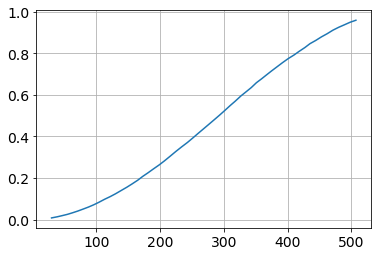

In [33]:
nf_PS2 = np.load(f'outputs/Cardiac_nf_PSCTPermute_{i}.npy',allow_pickle=True)
memory_PS2 = np.load(f'outputs/Cardiac_memory_log_PSCTPermute_{i}.npy',allow_pickle=True)/256/176/160
plt.plot(nf_PS2, memory_PS2)
plt.grid()
plt.show()